# Lab-2 Exercise-1
* Siddharth Singh
* 200968106

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


# Mapping Values for Better Result

In [3]:
mapping = {"tested_positive": 1,
      "tested_negative": 0}

data["result"] = data["result"].map(mapping)

In [4]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
mean = data.mean()
mean

preg        3.845052
plas      120.894531
pres       69.105469
skin       20.536458
insu       79.799479
mass       31.992578
pedi        0.471876
age        33.240885
result      0.348958
dtype: float64

# Describing the Whole Data

In [6]:
data.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Mean and Standard Deviation of Age of the Patients

In [7]:
age = data['age']
print("Mean age of the patients"                 , age.mean())
print("Standard Deviation of the age of patients",  age.std())

Mean age of the patients 33.240885416666664
Standard Deviation of the age of patients 11.76023154067868


# Visualizing The Age of Patients

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

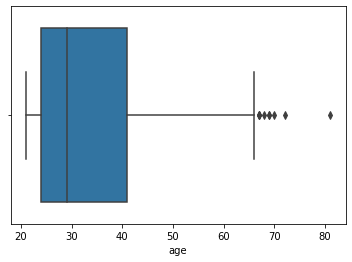

In [8]:
sns.boxplot(age)

<AxesSubplot:xlabel='age', ylabel='Count'>

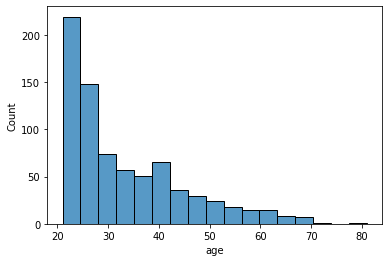

In [9]:
sns.histplot(age)

# Scatter Plot of Age and BMI of the Patients

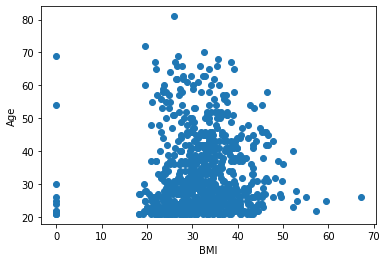

In [10]:
plt.scatter(data['mass'], data['age'])
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

# Checking Whether the classes are Imbalanced or not

In [11]:
print("Number of patients that resulted positive", (data["result"]==1).sum())
print("Number of patients that resulted negative", (data["result"]==0).sum())

Number of patients that resulted positive 268
Number of patients that resulted negative 500


###### The classes seem to be imbalanced, more negative patients are there than positive

# Importing Logistic Regression Model from SKLearn

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting into X and y dataset

In [13]:
X = data.copy()
y = X.pop('result')
X.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Preprocessing the Data

In [14]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Splitting the data into Train and Test Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Converting DataFrame to Numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [16]:
print("shape of X_train:", X_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of X_train: (537, 8)
shape of X_test: (231, 8)
shape of y_train: (537,)
shape of y_test: (231,)


# Fitting the dataset into the Model

In [17]:
clf = LogisticRegression(penalty='l2', random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Predicting the Values on the Dataset

In [18]:
y_pred = clf.predict(X_test)
print("Predicted values on Test data:", y_pred)

Predicted values on Test data: [0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


# Confusion Matrix on the Test Data

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[120,  31],
       [ 30,  50]], dtype=int64)

# Heatmap of the Confusion Matrix

<AxesSubplot:>

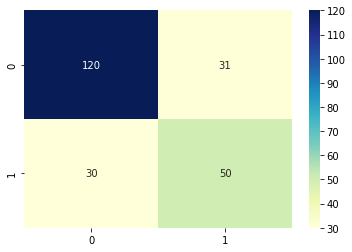

In [20]:
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')

## Accuracy score

In [21]:
acc = (cm[0,0] + cm[1,1]) /  cm.sum()
print("The accuracy of the model is: ", acc)

The accuracy of the model is:  0.7359307359307359


## True Positive Score

In [22]:
true_pos = cm[1,1] / cm[1, :].sum()
print("The true positive rate is:",true_pos)

The true positive rate is: 0.625


## True Negative Score

In [23]:
true_neg = cm[0, 0] / cm[0, :].sum()
print("The true negative rate is:", true_neg)

The true negative rate is: 0.7947019867549668


# Predicition Probabilities on X test

In [24]:
y_score = clf.predict_proba(X_test)[:, 1]

# ROC Curve Visualization

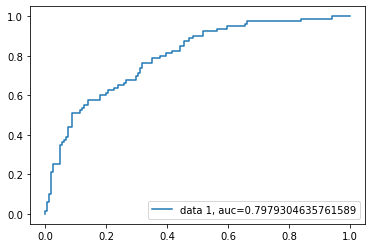

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test,  y_score)
auc = roc_auc_score(y_test, y_score)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

* The ROC_AUC_SCORE is ~0.80 which is pretty good on the dataset
* Meaning the classification done on the imbalanced dataset is good.